### Problem statement
Leveraging the data of Apollo 24/7, find out which variables are significant in predicting the reason for hospitalization for different regions and how well some variables like viral load, smoking, severity level describe the hospitalization charges

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
#Laoding the dataset
df = pd.read_csv("D:/Scaler/Projects/scaler_apollo_hospitals.csv", index_col = 0)

In [3]:
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [4]:
#checking the shape of dataset
df.shape

(1338, 7)

###### There are 1338 rows and 7 columns in our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [6]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [7]:
df.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [8]:
#checking for missing values
df.isnull().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

##### We can see that there are no missing values in our dataset

In [9]:
#checking for unique values in each column
df.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

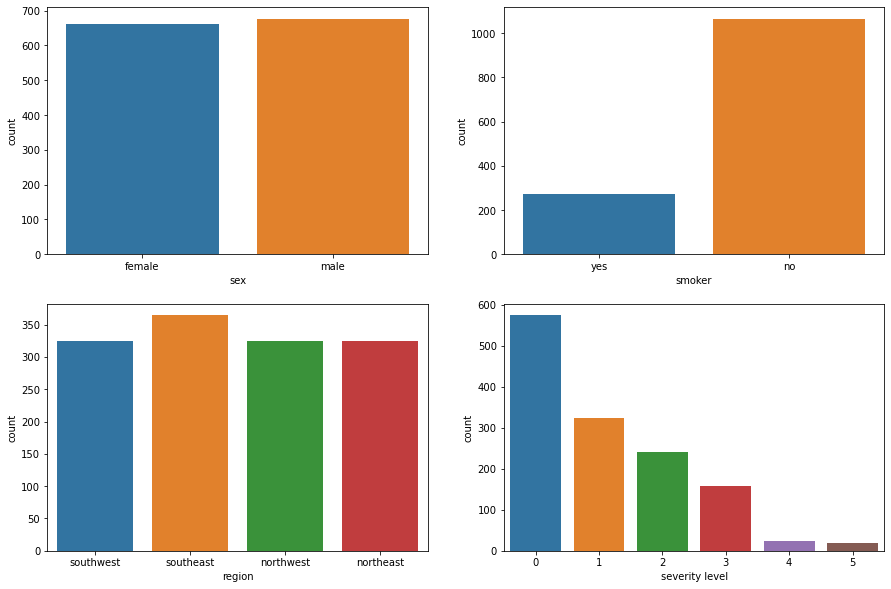

In [10]:
#Analysis of categorical columns by countplot
cat_cols = ['sex', 'smoker', 'region', 'severity level']
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df, x= cat_cols[k], ax=Axes[i,j])
        k += 1
plt.show()

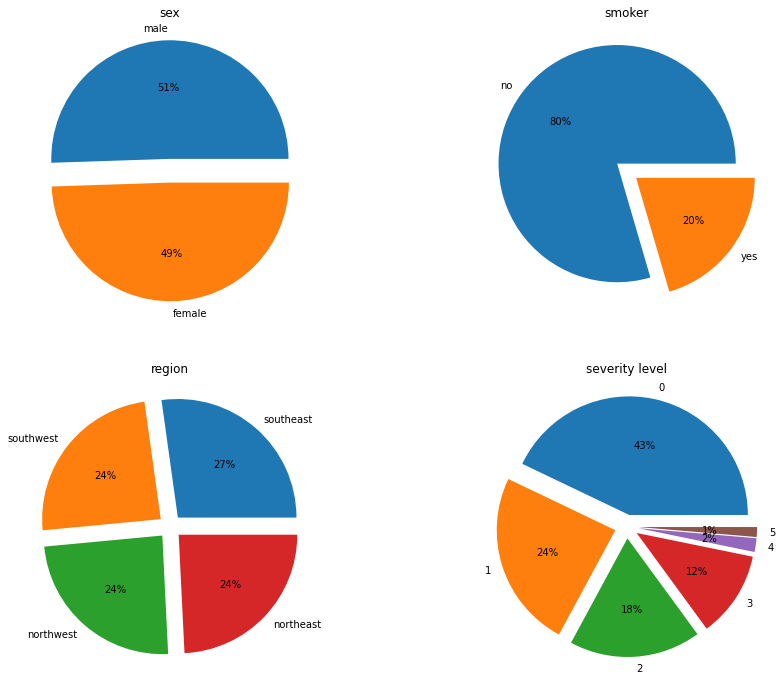

In [11]:
#Proportion analysis by pie chart of categorical columns
plt.figure(figsize = (15,12))
k = 0
for i in range(4):
    plt.subplot(2, 2, i+1)
    data = df[cat_cols[i]].value_counts(normalize=True)*100
    explode = [0.1]*len(data.index)
    plt.gca().title.set_text(cat_cols[i])
    plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', explode= explode)
    k += 1

###### We can see that there are almost equal data for both male and female, same goes for region
###### In the dataset, 80% are non smokers and 20% are smokers
###### 43% data is of patients with severity level 0 followed by level 1

In [12]:
#All numeric columns
cols = ['age', 'viral load', 'hospitalization charges']

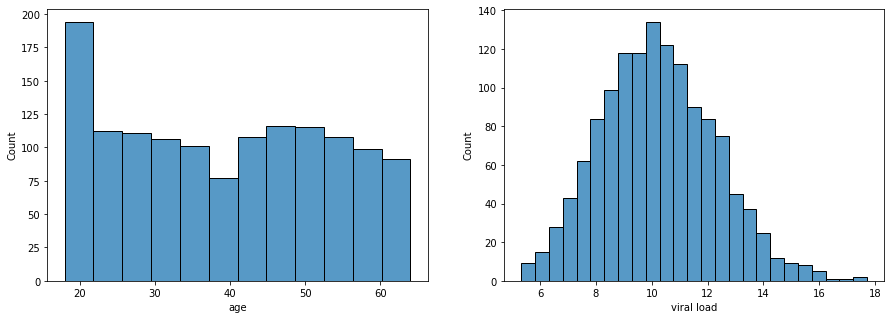

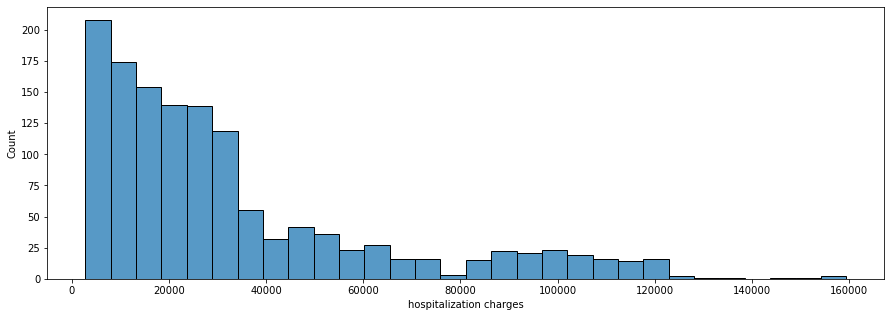

In [13]:
Fig, Axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
k = 0
for j in range(2):
    sns.histplot(data=df, x= cols[k], ax=Axes[j])
    k += 1
plt.show()
plt.figure(figsize = (15,5))
sns.histplot(data=df, x= cols[-1])
plt.show()

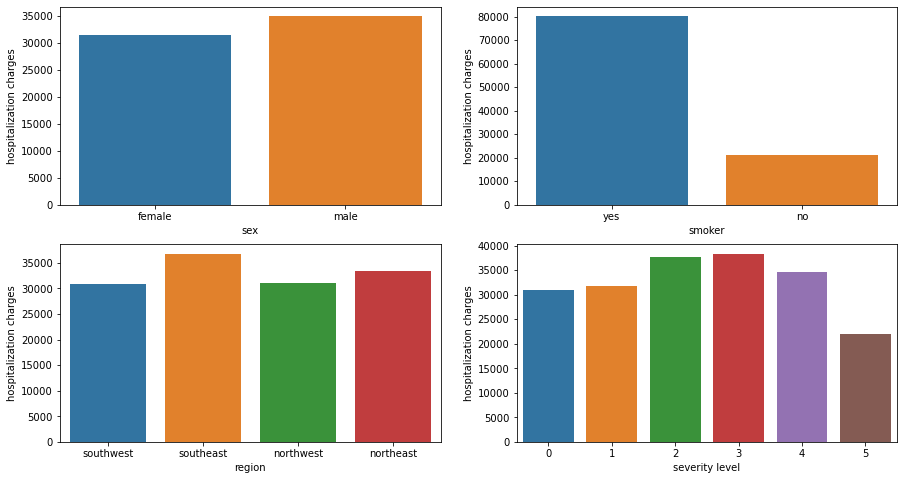

In [14]:
#Analysing the relationship between the dependent and inpendent variable by barplot
cat_cols = ['sex', 'smoker', 'region', 'severity level']
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
k = 0
for i in range(2):
    for j in range(2):
        sns.barplot(data=df, x= cat_cols[k], y= 'hospitalization charges', ax=Axes[i,j], ci = None)
        k += 1
plt.show()

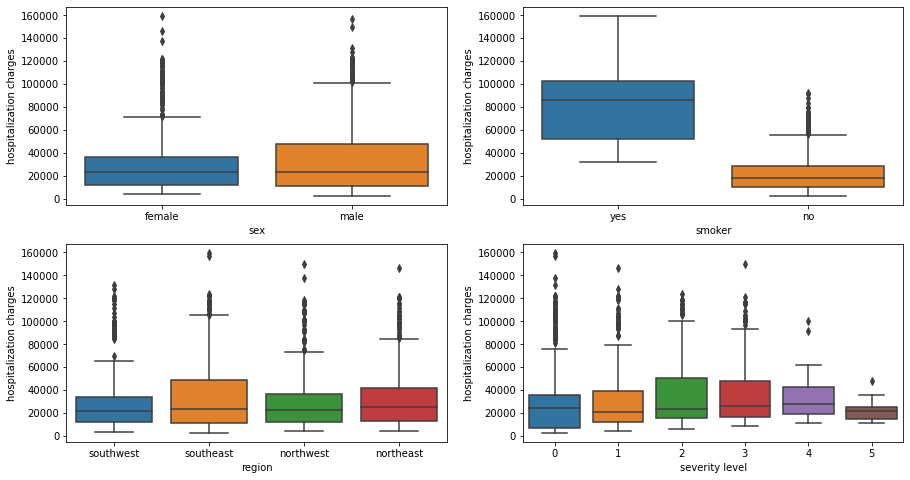

In [15]:
#Analysing the relationship between the dependent and inpendent variable by boxplot
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x= cat_cols[k], y= 'hospitalization charges', ax=Axes[i,j])
        k += 1
plt.show()

###### From the above barplot (average charges) and boxplot analysis:
###### 1) Average & median hospitalization charges of male are slightly greater than female
###### 2) Average & median hospitalization charges of smokers are greater than non-smokers
###### 3) Average & median hospitalization charges of southeast region are higher than other regions
###### 4) Average & median hospitalization charges of severity level 2,3,4 are greater than other severity levels

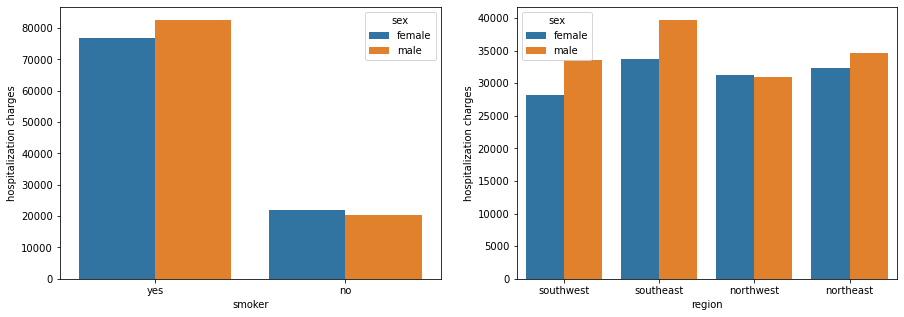

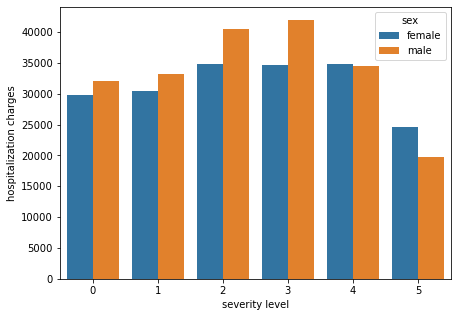

In [16]:
#Multivariate analysis
cols_2 = ['smoker', 'region', 'severity level']
Fig, Axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
k = 0
for i in range(2):
    sns.barplot(data=df, x= cols_2[k], y= 'hospitalization charges', hue = 'sex', ax=Axes[i], ci = None)
    k += 1
plt.show()
plt.figure(figsize = (7,5))
sns.barplot(data=df, x= cols_2[k], y= 'hospitalization charges', hue = 'sex', ci = None)
plt.show()

###### Hospitalization charges of females with severity level 2,3,4 is similar but we will analysis it through hypothesis testing also if they are actually similar or not 

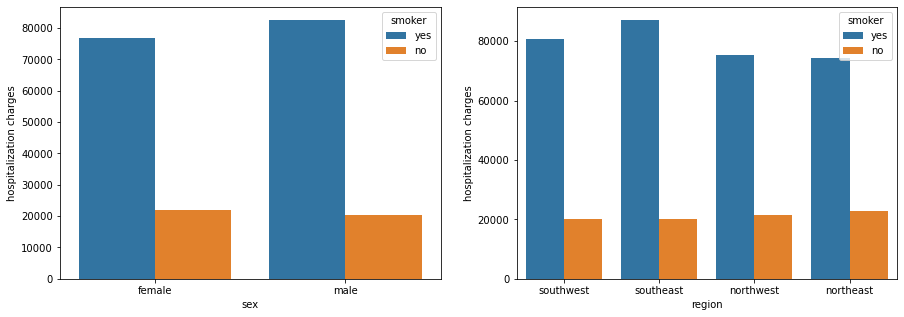

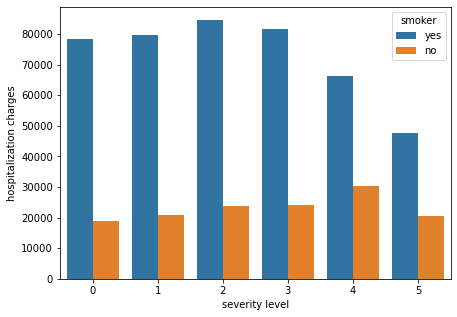

In [17]:
#Mulltivariate analysis
cols_3 = ['sex', 'region', 'severity level']
Fig, Axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
k = 0
for i in range(2):
    sns.barplot(data=df, x= cols_3[k], y= 'hospitalization charges', hue = 'smoker', ax=Axes[i], ci = None)
    k += 1
plt.show()
plt.figure(figsize = (7,5))
sns.barplot(data=df, x= cols_3[k], y= 'hospitalization charges', hue = 'smoker', ci = None)
plt.show()

###### We can see that hospitalization charges of smokers are greater than non smokers across both genders, all regions and all severity levels

### Correlation Matrix

In [18]:
df.corr()

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


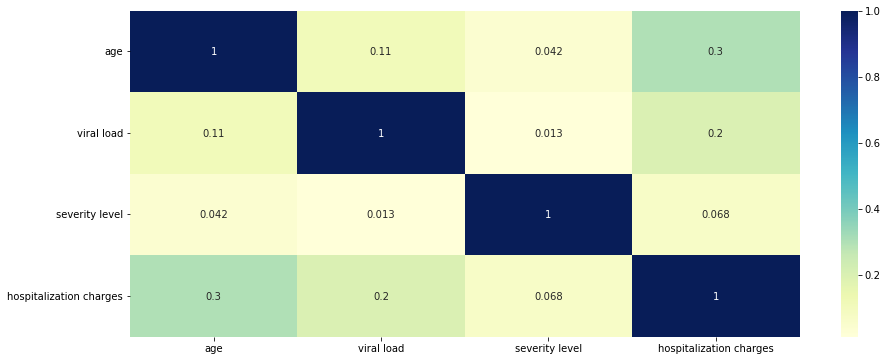

In [19]:
# Correlation Plot above of as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [20]:
le_data = df.copy() #creating a copy of original dataset first
label_encoder = LabelEncoder()
le_data['sex'] = label_encoder.fit_transform(le_data['sex']) #lebel encoding sex
le_data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [21]:
le_data['smoker'] = label_encoder.fit_transform(le_data['smoker']) #lebel encoding smoker
le_data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [22]:
le_data['region'] = label_encoder.fit_transform(le_data['region']) #lebel encoding smoker
le_data['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [23]:
le_data.corr()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
age,1.000000,-0.020856,-0.025019,0.002127,0.109300,0.042469,0.299008
sex,-0.020856,1.000000,0.076185,0.004588,0.046343,0.017163,0.057292
smoker,-0.025019,0.076185,1.000000,-0.002181,0.003739,0.007673,0.787251
region,0.002127,0.004588,-0.002181,1.000000,0.157520,0.016569,-0.006208
viral load,0.109300,0.046343,0.003739,0.157520,1.000000,0.012729,0.198388
severity level,0.042469,0.017163,0.007673,0.016569,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.057292,0.787251,-0.006208,0.198388,0.067998,1.000000


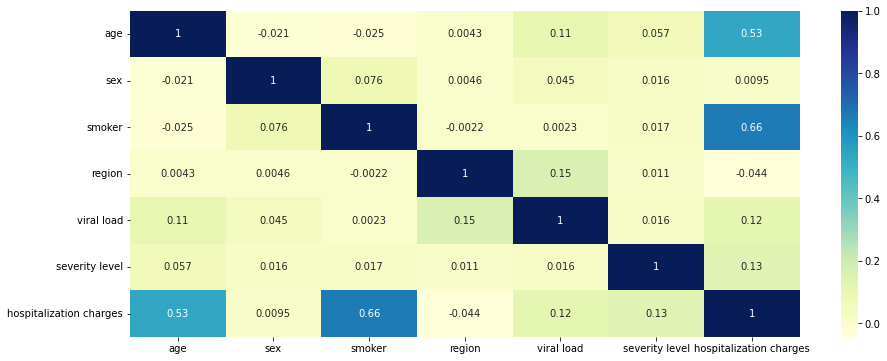

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(le_data.corr(method= 'spearman'), cmap="YlGnBu", annot=True)
plt.show()

##### We can see that there is positive correlation between hospitalization charges & age and  hospitalization & smoker

### Outlier Detection

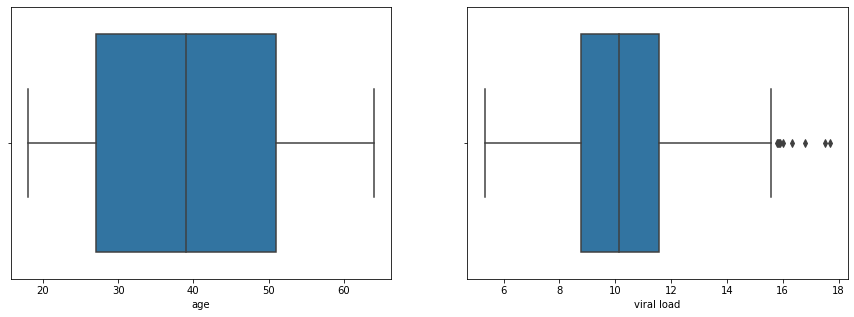

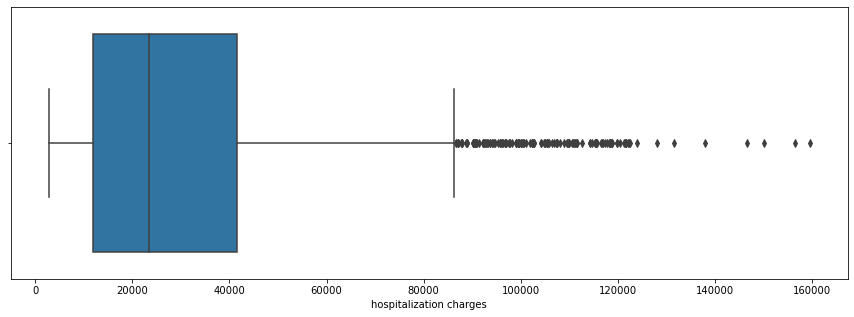

In [25]:
#Looking for outliers using boxplot
Fig, Axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
k = 0
for i in range(2):
    sns.boxplot(data=df, x = cols[k], ax=Axes[i])
    k += 1
plt.show()
plt.figure(figsize = (15,5))
sns.boxplot(data=df, x = cols[-1])
plt.show()

In [26]:
#Checking for percentage of outliers present in all numeric variables
for col in cols:
    df_count = df[col]
    q1 = np.percentile(df_count,25)
    q3 = np.percentile(df_count,75)
    IQR = q3-q1
    upper= q3+1.5*IQR
    lower= q1-1.5*IQR
    if lower < 0:
        lower = 0
    length_excl_outliers = len(df[(df_count>lower)&(df_count<upper)])
    print(f'{np.round((len(df_count)-length_excl_outliers)/len(df_count),3)}% outliers are present in {col}')

0.0% outliers are present in age
0.007% outliers are present in viral load
0.104% outliers are present in hospitalization charges


###### There are very less outliers present in age and viral load. And in hospitalization charges, even though there are few outliers but we will keep those as there can be high hospitalization charges in some cases

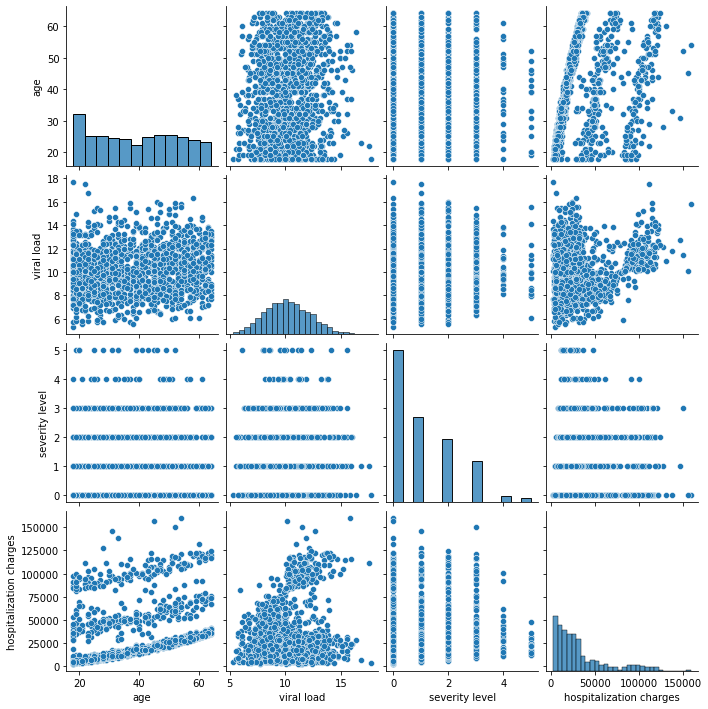

In [27]:
sns.pairplot(df)

### Right tailed T-Test to check whether hospitalization charges are higher for smokers than non smokers

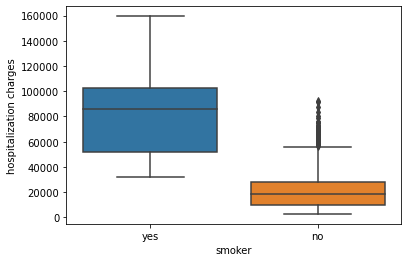

In [28]:
sns.boxplot(data =df, x = 'smoker', y = 'hospitalization charges')
plt.show()

###### From the above box plot, hospitalization charges for those who do smoking are higher than who don't but we will check it statistically by hypothesis testing

In [29]:
smokers = df[df['smoker'] == 'yes']['hospitalization charges']
non_smokers = df[df['smoker'] == 'no']['hospitalization charges']

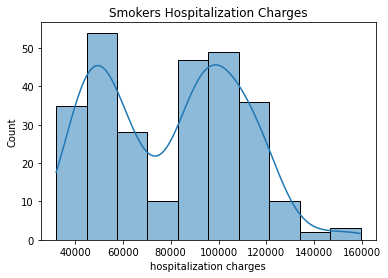

In [30]:
sns.histplot(smokers, kde = True)
plt.title('Smokers Hospitalization Charges')
plt.show()

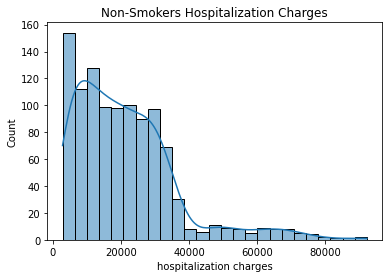

In [31]:
sns.histplot(non_smokers, kde = True)
plt.title('Non-Smokers Hospitalization Charges')
plt.show()

##### Hypothesis:
##### Ho: Mean hospitalization charges of smokers and non smokers are same
##### Ha: Mean hospitalizaiton charges of smokers are greater than non-smokers

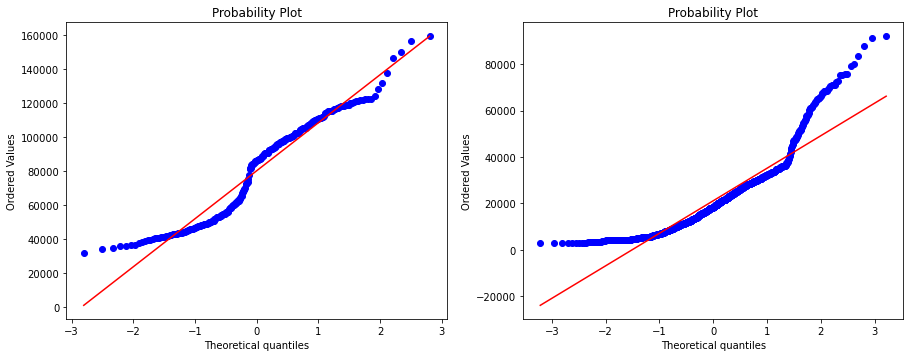

In [32]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(smokers, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(non_smokers, dist=stats.norm, plot=ax2)
plt.show()

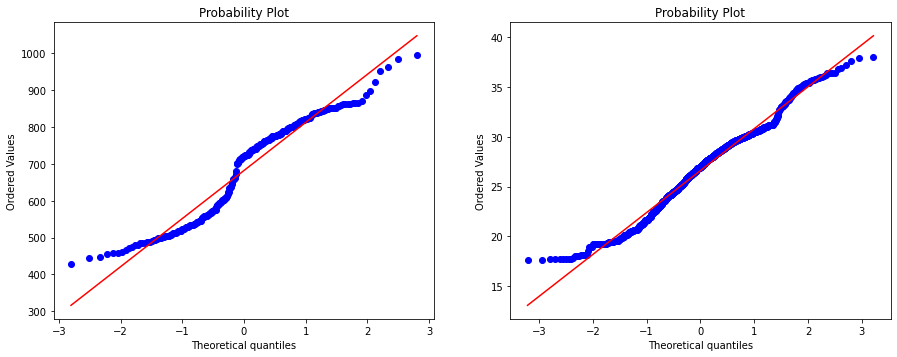

In [33]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(smokers)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(non_smokers)[0], dist=stats.norm, plot=ax2)
plt.show()

In [34]:
#Cheking normality by using Shapiro-wilk test
print(stats.shapiro(smokers))
print(stats.shapiro(non_smokers))

ShapiroResult(statistic=0.939551830291748, pvalue=3.6248792856241607e-09)
ShapiroResult(statistic=0.8728622794151306, pvalue=1.4454367844287343e-28)


###### From the histogram and Q-Q plot, we can say that both variables are not normal. Shapiro wilk test also proves the same as p values are very less than 0.05

In [35]:
#Cheking for variance
np.var(smokers),np.var(non_smokers)

(829508540.9016069, 224322878.53678074)

In [36]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(smokers, non_smokers)

LeveneResult(statistic=332.6132009308764, pvalue=1.5595259401311176e-66)

###### We can see that P values for levene's test is very low so we reject the levene's test null hypothesis
###### Variances for both variables are different
###### So here assumptions are not met for t test . Even after applying boxcox transformation the variable are not normally distributed but still proceeding with t-test

In [37]:
stats.ttest_ind(smokers, non_smokers, alternative = 'greater')

Ttest_indResult(statistic=46.66489219013773, pvalue=4.1378462637459944e-283)

###### We can see that P value is very low and less than 0.05
###### if alpha = 0.05, confidence = 95%
###### We reject the null hypothesis so mean hospitalization charges for smokers are greater than non-smokers

### Two tailed T-Test to check whether viral load of females is different from that of males or not

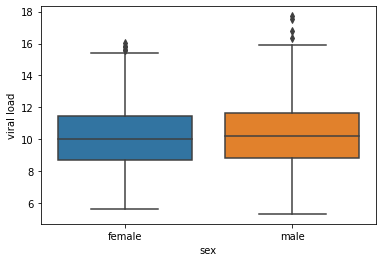

In [38]:
sns.boxplot(data =df, x = 'sex', y = 'viral load')
plt.show()

###### From the above boxplot, we can see that viral load for both male and female are same but will check it by hypothesis testing

In [39]:
vl_female = df[df['sex']=='female']['viral load']
vl_male = df[df['sex']=='male']['viral load']

##### Hypothesis:
##### Ho: Mean viral load of male and female is same
##### Ha: Mean viral load of male and female is different

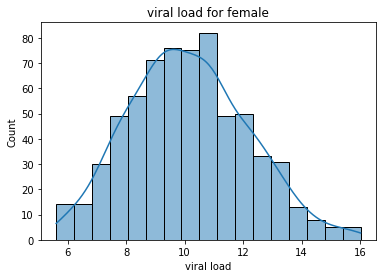

In [40]:
sns.histplot(vl_female , kde = True)
plt.title('viral load for female')
plt.show()

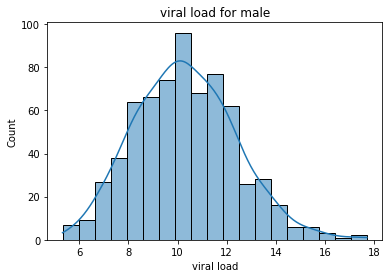

In [41]:
sns.histplot(vl_male , kde = True)
plt.title('viral load for male')
plt.show()

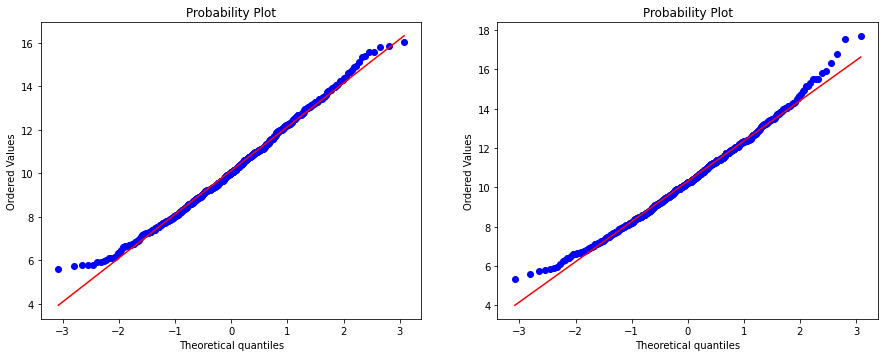

In [42]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(vl_female, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(vl_male, dist=stats.norm, plot=ax2)
plt.show()

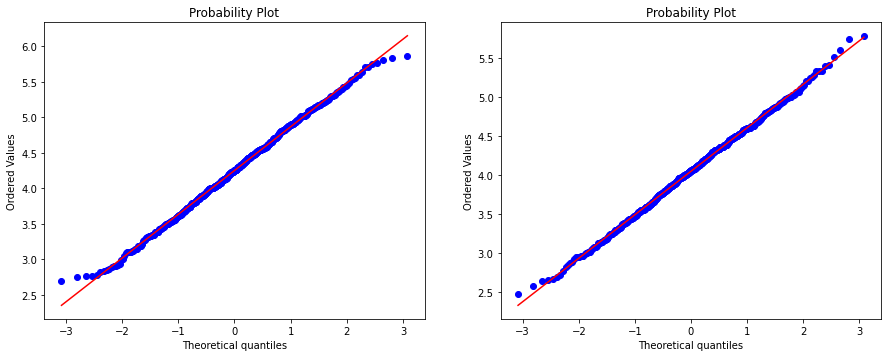

In [43]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(vl_female)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(vl_male)[0], dist=stats.norm, plot=ax2)
plt.show()

In [44]:
#Cheking normality by using Shapiro-wilk test
print(stats.shapiro(vl_female))
print(stats.shapiro(vl_male))

ShapiroResult(statistic=0.9930474162101746, pvalue=0.003624602919444442)
ShapiroResult(statistic=0.993064820766449, pvalue=0.0031888585072010756)


###### From the histogram and Q-Q plot, we can say that both variables are following normal distribution

In [45]:
np.var(vl_female),np.var(vl_male)

(4.055708441872559, 4.183557507396447)

In [46]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(vl_female, vl_male)

LeveneResult(statistic=0.0038754151966871046, pvalue=0.9503708012456551)

###### We can see that P values for levene's test is higher than 0.05 so we fail to reject the levene's test null hypothesis
###### Variances for both variables are equal
###### So here assumptions for normality and variance are met for t test 

In [47]:
stats.ttest_ind(vl_female, vl_male)

Ttest_indResult(statistic=-1.695711164450323, pvalue=0.0901735841670204)

###### We can see that P value is higher than 0.05
###### if alpha = 0.05, confidence = 95%
###### We fail to reject the null hypothesis so mean viral load for both female and male is equal

### Chi square test to check if the proportion of smoking significantly different  or same across different regions 

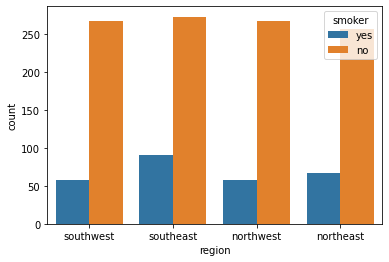

In [48]:
sns.countplot(x = 'region', hue ='smoker', data = df)
plt.show()

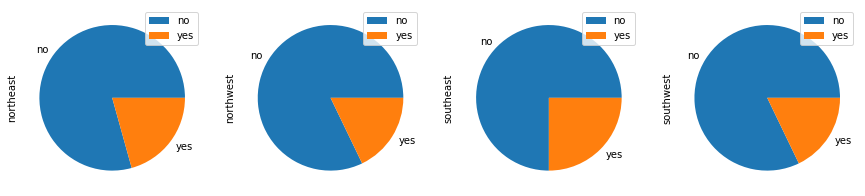

In [49]:
pd.crosstab(index=df["smoker"],  columns=df["region"]).plot.pie(subplots=True, figsize = (15,5))
plt.show()

###### From the above plots, we can see that proportions of smokers is almost same across regions but we will check it through hypothesis testing

###### Hypothesis:
###### H0: Proportion of smoking is similar across different regions
###### Ha: Proportion of smoking is significantly different across different regions

In [50]:
smoker_region = pd.crosstab(index=df["smoker"],  columns=df["region"])
smoker_region

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [51]:
stats.chi2_contingency(smoker_region)

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

In [52]:
expected_freq = stats.chi2_contingency(smoker_region)[3]
expected_freq

array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]])

###### Here we can see that expected frequency in all cells in above array is greater than 5. Both variables are categorical and all observations are indenpendent
###### So all assumptions are met for chi square test

In [53]:
p_value = stats.chi2_contingency(smoker_region)[1]
p_value

0.06171954839170547

###### We can see that P value is greater than 0.05
###### if alpha = 0.05, confidence = 95%
###### We fail to reject the null hypothesis so proportion of smoking is same across different regions

### One way Annova to check if the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is same

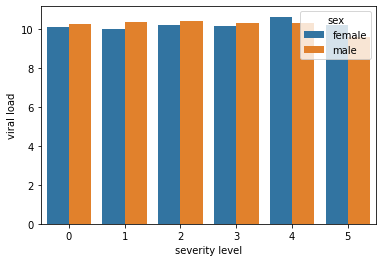

In [54]:
sns.barplot(data=df, x= 'severity level', y= 'viral load', hue = 'sex', ci = None)
plt.show()

###### From the above barplot, we can say that mean viral load of female with severity level 0,1,2 is same but we will prove it through hypothesis testing|

###### Hypothesis:
###### H0: Mean Viral load of women with severity level 0, 1, 2 is similar
###### Ha: Mean Viral load of women with severity level 0, 1, 2 is dfiferent

In [55]:
df_sex = df[df['sex']== 'female']
a = df_sex[df_sex['severity level'] == 0]['viral load']
b = df_sex[df_sex['severity level'] == 1]['viral load']
c = df_sex[df_sex['severity level'] == 2]['viral load']

###### Checking if the assumptions are met to apply annova

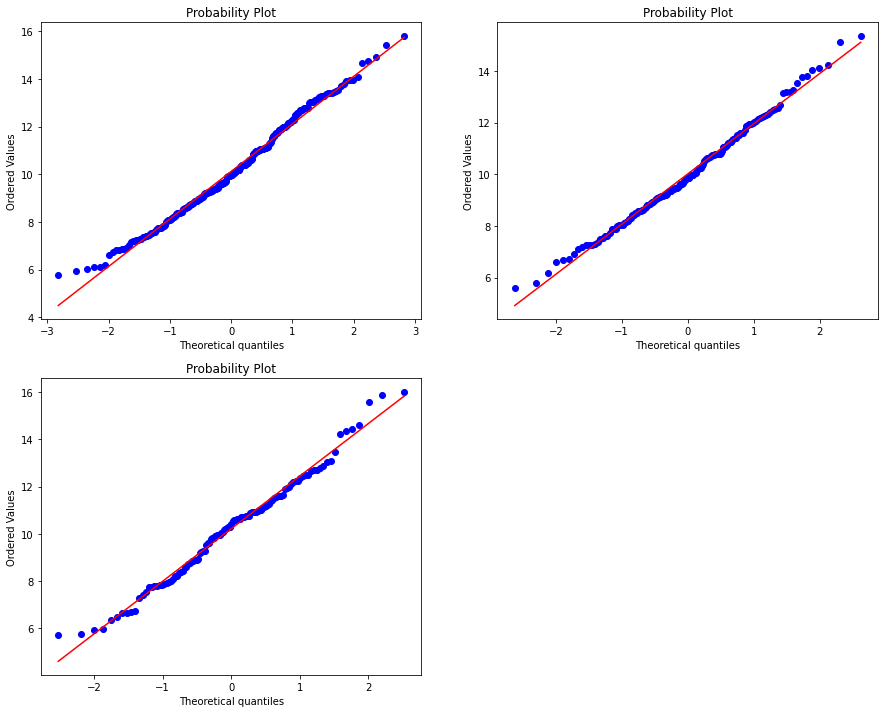

In [56]:
# Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(a, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(b, dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(c, dist=stats.norm, plot=ax3)
plt.show()

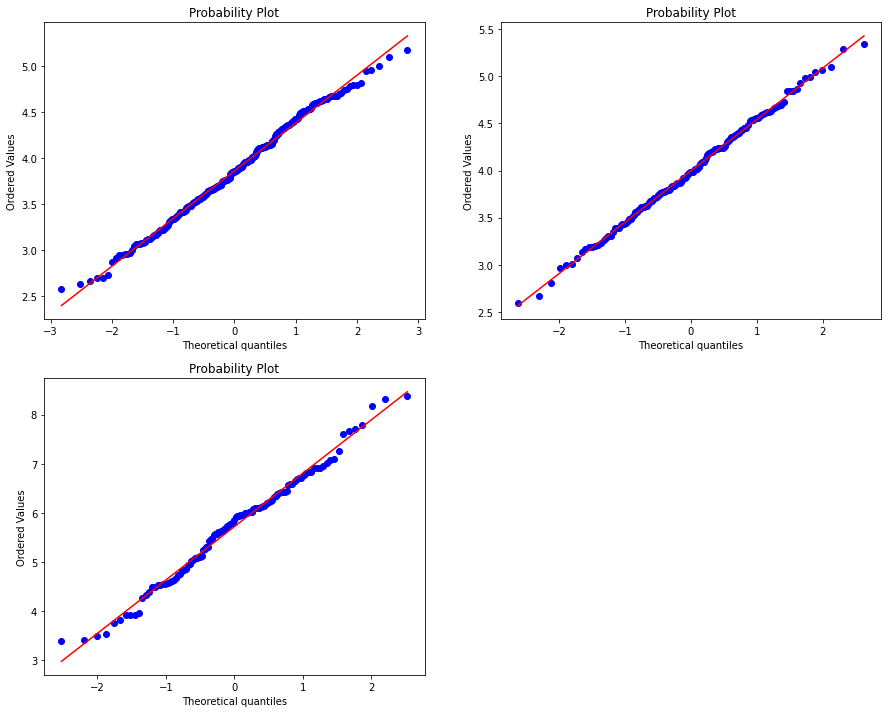

In [57]:
# Checking for normal distribution after applying boxcox distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(a)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(b)[0], dist=stats.norm, plot=ax2)
ax3 = fig.add_subplot(223)
stats.probplot(stats.boxcox(c)[0], dist=stats.norm, plot=ax3)
plt.show()

In [58]:
#Cheking normality by using Shapiro-wilk test
print(stats.shapiro(a))
print(stats.shapiro(b))
print(stats.shapiro(c))

ShapiroResult(statistic=0.9896610379219055, pvalue=0.038132064044475555)
ShapiroResult(statistic=0.9921300411224365, pvalue=0.539344072341919)
ShapiroResult(statistic=0.9860242009162903, pvalue=0.2586005926132202)


###### In the shapiro-wilk test, p value for only variable a is less than 0.05, for variable b and c the p value is greater than 0.05 so only a is following normal distribution but b and c are not following normal distribution

In [59]:
#Cheking for variance
np.var(a),np.var(b), np.var(c)

(3.942714696902578, 3.697740426213749, 4.841683920627076)

In [60]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(a,b,c)

LeveneResult(statistic=0.9435131022565071, pvalue=0.38987253596513605)

###### We can see that P values for levene's test is very low so we reject the levene's test null hypothesis
###### Variances for both variables are different
###### So here assumptions are not met for annova . Even after applying boxcox transformation the variable are not normally distributed but still proceeding with one way anova test

In [61]:
#Applying Anova test
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.3355061434584082, pvalue=0.7151189650367746)

###### We can see that P value is higher than 0.05
###### if alpha = 0.05, confidence = 95%
###### We fail to reject the null hypothesis so viral load of women with severity level 0,1,2 is similar

### Hypothesis testing to check whether hospitalization charges are same or different for males than females

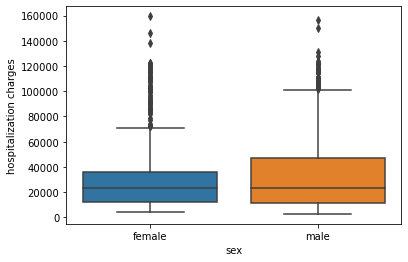

In [62]:
sns.boxplot(data = df, x = 'sex', y='hospitalization charges')
plt.show()

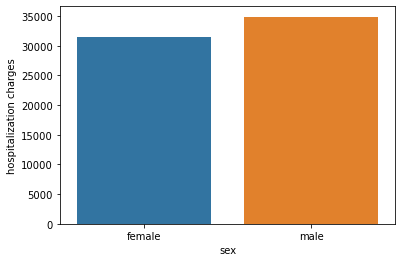

In [63]:
sns.barplot(data = df, x = 'sex', y='hospitalization charges', ci = None)
plt.show()

###### Hypothesis:
###### Ho: Mean hospitalization charges of male and female is same
###### Ha: Mean hospitalization charges of male and female is different

In [64]:
hc_female = df[df['sex']=='female']['hospitalization charges']
hc_male = df[df['sex']=='male']['hospitalization charges']

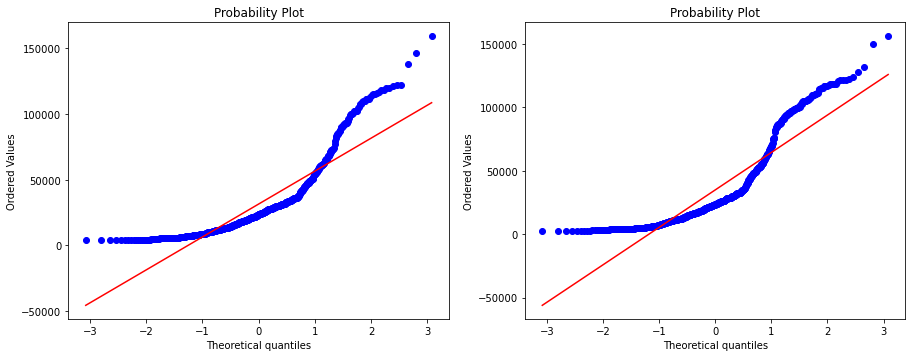

In [65]:
#Checking for normal distribution
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(hc_female, dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(hc_male, dist=stats.norm, plot=ax2)
plt.show()

###### We can see that both variables are not following normal distribution

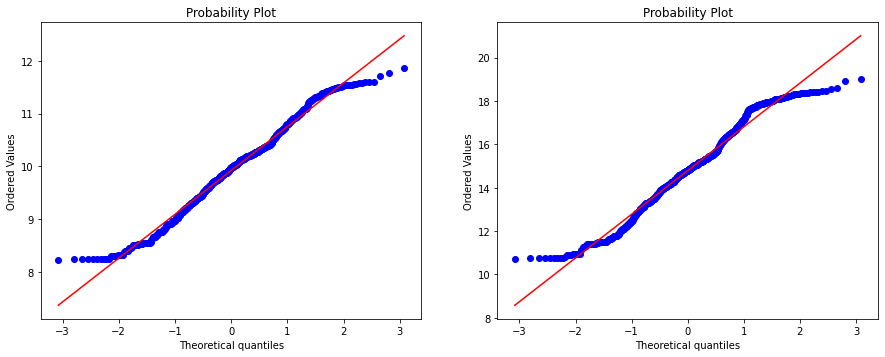

In [66]:
# Checking for normal distribution after applying boxcox transformation
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(221)
stats.probplot(stats.boxcox(hc_female)[0], dist=stats.norm, plot=ax1)
ax2 = fig.add_subplot(222)
stats.probplot(stats.boxcox(hc_male)[0], dist=stats.norm, plot=ax2)
plt.show()

###### We can see that both variables are not exactly following the normal distribution even after applying boxcox transformation

In [67]:
#Cheking normality by using Shapiro-wilk test
print(stats.shapiro(hc_female))
print(stats.shapiro(hc_male))

ShapiroResult(statistic=0.8053942322731018, pvalue=1.830527656441053e-27)
ShapiroResult(statistic=0.8228133320808411, pvalue=1.1787187379203558e-26)


###### From Q-Q plot, we can see that both variables are not following the normal distribution and shapiro wilk test also proves the same as p values are very less than 0.05

In [68]:
np.var(hc_female),np.var(hc_male)

(772881333.8097314, 1049991245.2470409)

In [69]:
#Checking for variance using the levene's test
# H0: Variances are equal
# Ha: Variances are not equal
stats.levene(hc_female, hc_male)

LeveneResult(statistic=9.909308253475983, pvalue=0.0016808248849247821)

###### We can see that P values for levene's test is very low so we reject the levene's test null hypothesis
###### Variances for both variables are different
###### So here assumptions are not met for t test, Here we can use non-parametric test kruskal wallis test.

In [70]:
stats.kruskal(hc_female, hc_male)

KruskalResult(statistic=0.12030470866603221, pvalue=0.7287042431543354)

###### We can see that P value is higher than 0.05
###### if alpha = 0.05, confidence = 95%
###### We fail to reject the null hypothesis so hospitalization charges of male and female are same